In [1]:
from baf2sql2unidec import *
import matplotlib.pyplot as plt
import os
import unidec
from unidec.metaunidec.mudeng import MetaUniDec
from unidec import tools as ud
import pandas as pd

In [2]:
def match(pks, masslist, names, tolerance):
    matches = []
    errors = []
    peaks = []
    nameslist = []

    for p in pks:

        target = p.mass
    #     print(target)
        nearpt = ud.nearestunsorted(masslist, target)

        match = masslist[nearpt]
        error = target-match
        if np.abs(error) < tolerance: 
            name = names[nearpt]
            p.error = error
        else:
            name = ""
        p.label = name
        p.match = match
        p.matcherror = error

        matches.append(match)
        errors.append(error)
        peaks.append(target)
        nameslist.append(name)
        
    matchlist = [peaks, matches, errors, nameslist]
    return matchlist 

### Updates:
- Now runs through pip installed unidec 
- Improved matching algorithm
- Added upload from .d files using baf2sql (much faster than mzML)


In [3]:
# path = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing\\20230710 4C_24h_1.d"
directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h"

scans = [434, 481]

masslist = [13597.42, 13151.97, 12559.36]
names = ["CTB-H6", "CTB-LPETGVSEYG", "CTB-LPET"]
tolerance = 10

In [4]:
# spectrum = BafSpectrum()
# name, data = spectrum.export_scans_from_file(path, scanstart = scans[0], scanend = scans[1])
# plt.plot(data[:, 0], data[:, 1])
# plt.plot(spectrum.rt, spectrum.tic)
# plt.axvspan(spectrum.rt[scans[0]], spectrum.rt[scans[1]])

In [5]:
scans = [434, 481]

spectra_names = [x for x in os.listdir(directory) if x[-2:] == ".d"]

spectra = []
for s in spectra_names:
    path = os.path.join(directory, s)
    spectrum = BafSpectrum()
    spectrum.export_scans_from_file(path, scanstart = scans[0], scanend = scans[1])
    spectra.append(spectrum)

Specified BAF has 738 spectra with line and profile data.
Specified BAF has 745 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 739 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 739 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF has 738 spectra with line and profile data.
Specified BAF 

In [6]:
hdf5_name = os.path.split(directory)[1]+".hdf5"

hdf5_path = os.path.join(directory, hdf5_name)
eng= MetaUniDec()
eng.data.new_file(hdf5_path)


UniDec Engine v.6.0.4

UniDec Path: C:\Users\cm19ljc\Anaconda3\envs\unidec3\lib\site-packages\unidec\bin\unidec.exe


In [7]:
for s in spectra:
    
    eng.data.add_data(s.data2, name=s.name, export=False)
eng.data.export_hdf5()

Adding: 20230710 15C_24h_1.d to ms_dataset
Adding: 20230710 15C_24h_10.d to ms_dataset
Adding: 20230710 15C_24h_11.d to ms_dataset
Adding: 20230710 15C_24h_12.d to ms_dataset
Adding: 20230710 15C_24h_13.d to ms_dataset
Adding: 20230710 15C_24h_14.d to ms_dataset
Adding: 20230710 15C_24h_15.d to ms_dataset
Adding: 20230710 15C_24h_16.d to ms_dataset
Adding: 20230710 15C_24h_2.d to ms_dataset
Adding: 20230710 15C_24h_3.d to ms_dataset
Adding: 20230710 15C_24h_4.d to ms_dataset
Adding: 20230710 15C_24h_5.d to ms_dataset
Adding: 20230710 15C_24h_6.d to ms_dataset
Adding: 20230710 15C_24h_7.d to ms_dataset
Adding: 20230710 15C_24h_8.d to ms_dataset
Adding: 20230710 15C_24h_9.d to ms_dataset
Adding: 20230710 25C_24h_1.d to ms_dataset
Adding: 20230710 25C_24h_10.d to ms_dataset
Adding: 20230710 25C_24h_11.d to ms_dataset
Adding: 20230710 25C_24h_12.d to ms_dataset
Adding: 20230710 25C_24h_13.d to ms_dataset
Adding: 20230710 25C_24h_14.d to ms_dataset
Adding: 20230710 25C_24h_15.d to ms_datase

In [8]:
len(spectra)

48

In [9]:
# Parameters
# UniDec
eng.config.minmz=700
eng.config.numit = 100
eng.config.zzsig = 1
eng.config.psig = 1
eng.config.beta = 1
eng.config.startz = 1
eng.config.endz = 100
eng.config.numz = 100
eng.config.mzsig = 0.85
eng.config.automzsig = 0
eng.config.psfun = 0
eng.config.psfunz = 0
eng.config.autopsfun = 0
eng.config.massub = 17000
eng.config.masslb = 12000
eng.config.msig = 0
eng.config.molig = 0
eng.config.massbins = 1
eng.config.adductmass = 1.007276467
eng.config.baselineflag = 1
eng.config.aggressiveflag = 0
eng.config.noiseflag = 0
eng.config.isotopemode = 0
eng.config.orbimode = 0

# Other
eng.config.mtabsig = 0
eng.config.poolflag = 2
eng.config.nativezub = 1000
eng.config.nativezlb = -1000
eng.config.inflate = 1
eng.config.linflag = 2
eng.config.integratelb = ""
eng.config.integrateub = ""
eng.config.filterwidth = 20
eng.config.zerolog = -12

eng.config.datanorm = 1
eng.config.subuff=100
eng.config.subtype=2

# peak picking
eng.config.peakwindow = 10
eng.config.peaknorm = 0
eng.config.peakplotthresh = 0.1 
eng.config.peakthresh = 0.01


eng.config.datanorm = 0
eng.config.exnorm = 0
eng.config.write_hdf5()

In [22]:
eng.config.__dict__

{'version': '6.0.4',
 'inputversion': None,
 'dtype': numpy.float32,
 'system': 'Windows',
 'infname': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\UniDec_Figures_and_Files\\24h_input.dat',
 'outfname': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\UniDec_Figures_and_Files\\24h',
 'mfile': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\UniDec_Figures_and_Files\\24h_mfile.dat',
 'manualfile': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\UniDec_Figures_and_Files\\24h_manualfile.dat',
 'smashfile': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\UniDec_Figures_and_Files\\24h_smashfile.dat',
 'confname': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\UniDec_Figures_and_Files\\24h_conf.dat',
 'hdf_file': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\24h.hdf5',
 'ofile': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\UniDec_Figures_and_Files\\24h_ofile.dat',
 'matchfile': 'D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h\\UniDec_Figures_and_Files\\24h_match.dat',
 'peaksfile': 'D:\\WORK\\20230710 DOE_CTB H6_

In [10]:
eng.open(hdf5_path)
eng.process_data()

eng.run_unidec()


Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Opening Time: 4.482990000000001
Execution Time: 2.4668082999999967
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Execution Time: 2116.5882766000004
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)


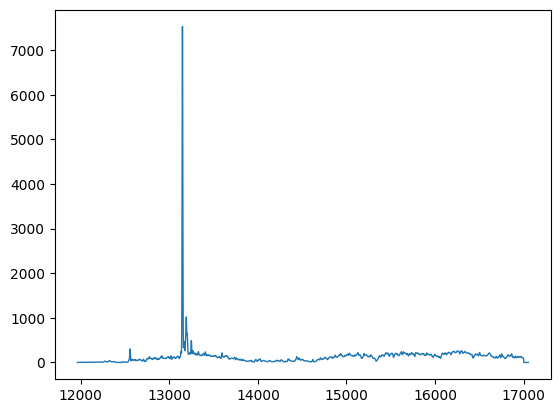

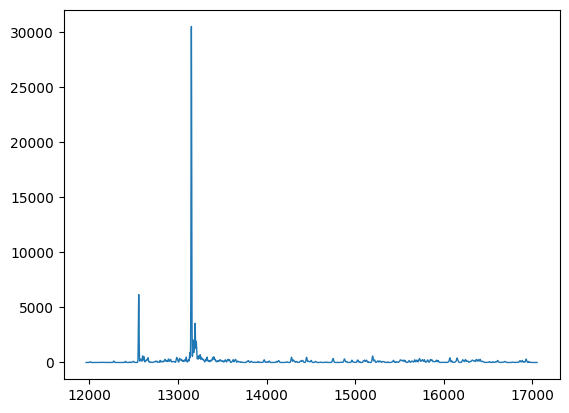

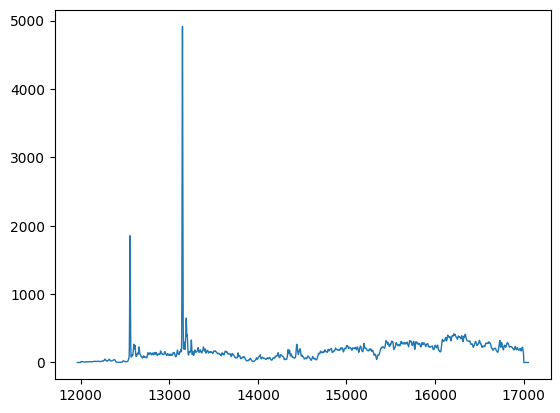

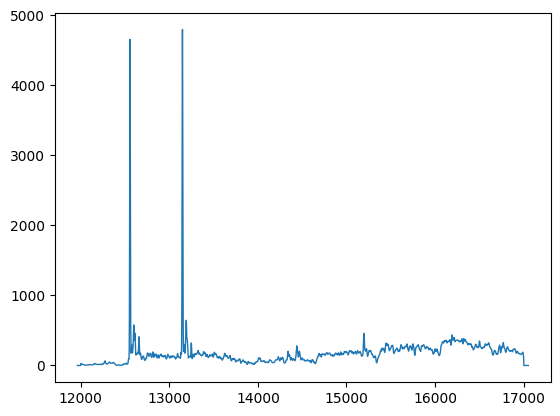

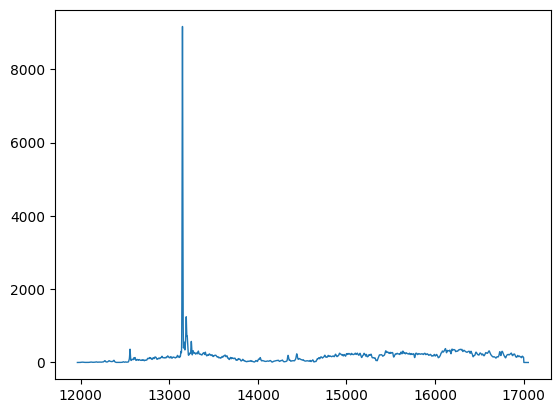

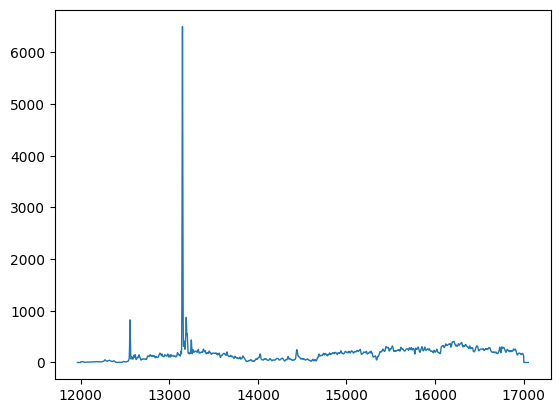

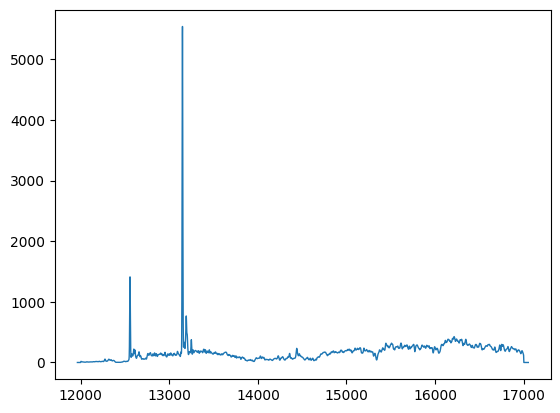

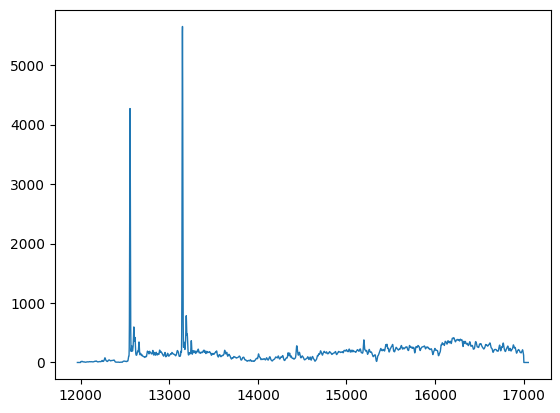

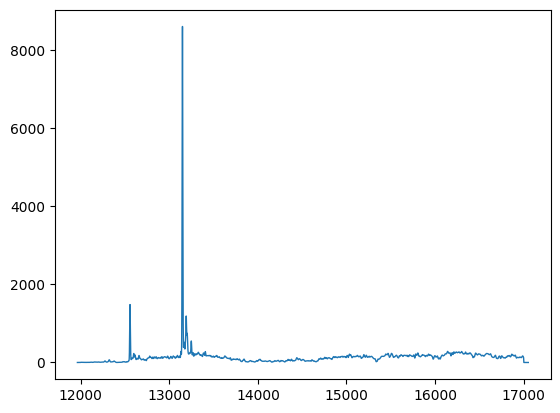

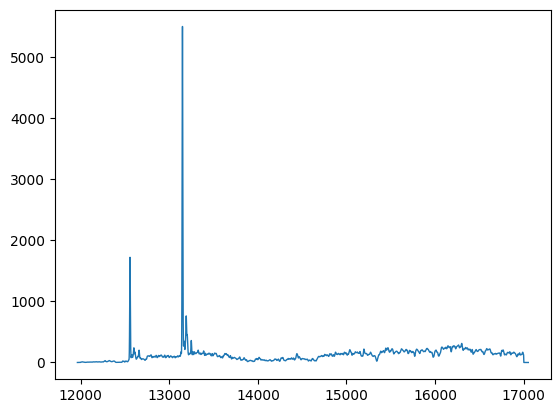

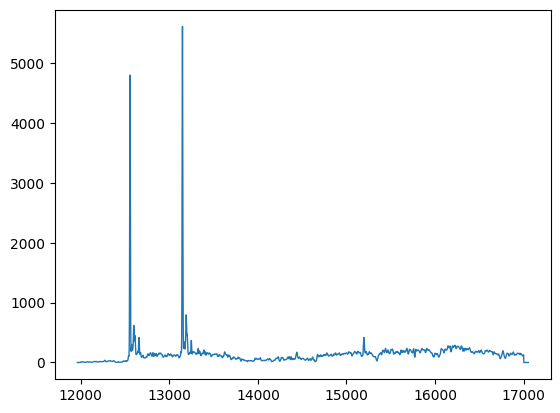

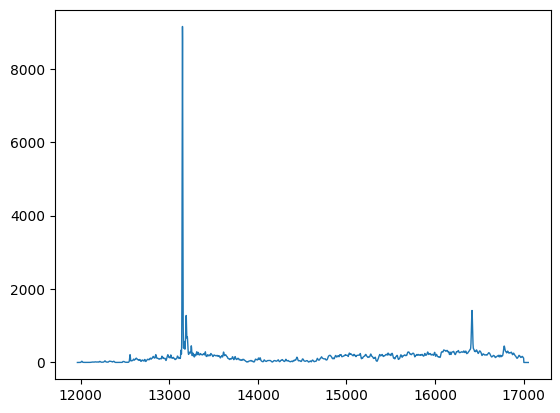

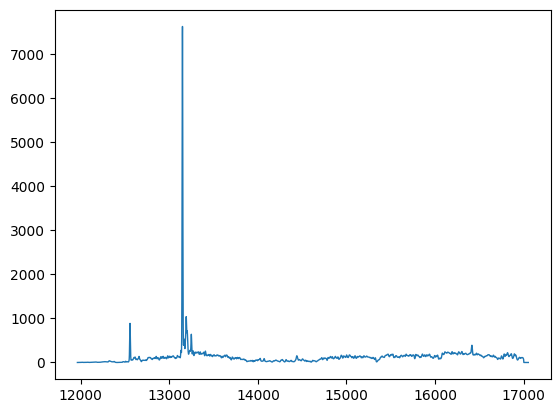

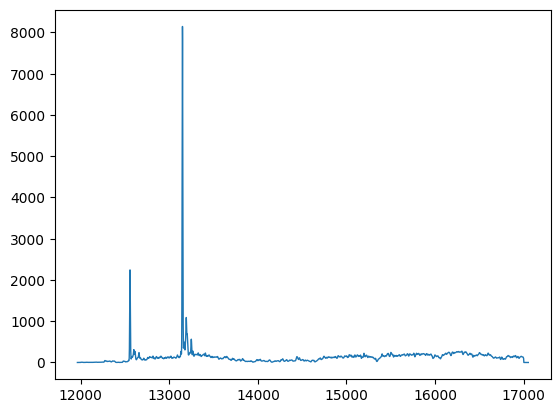

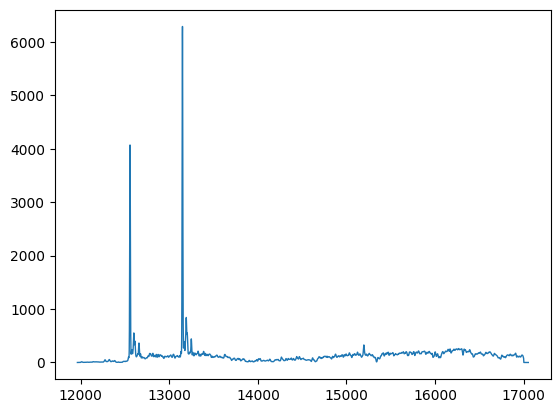

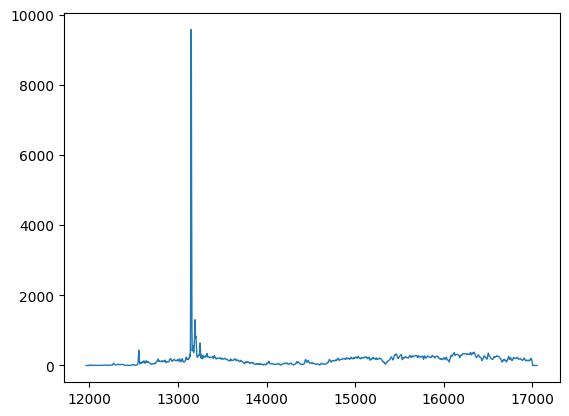

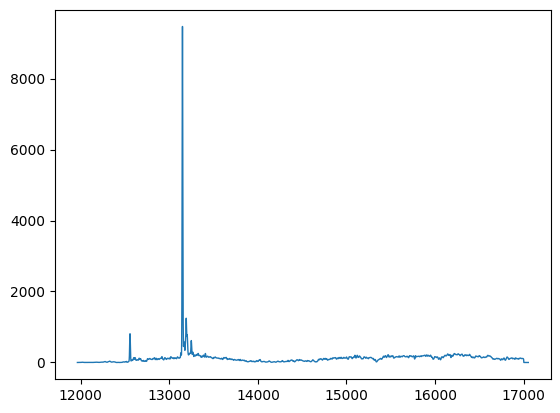

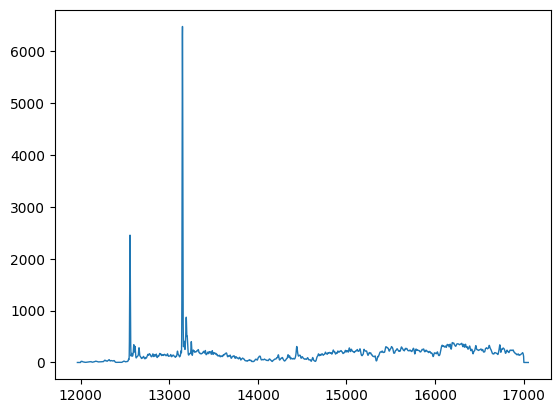

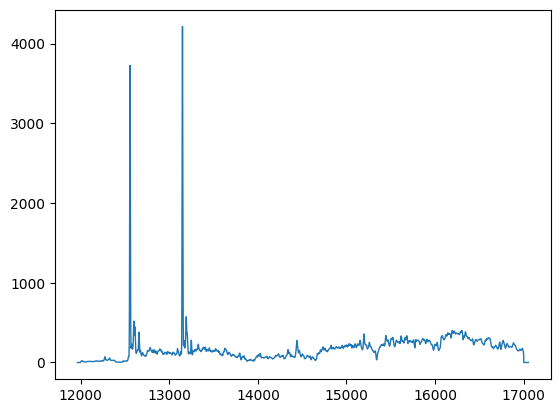

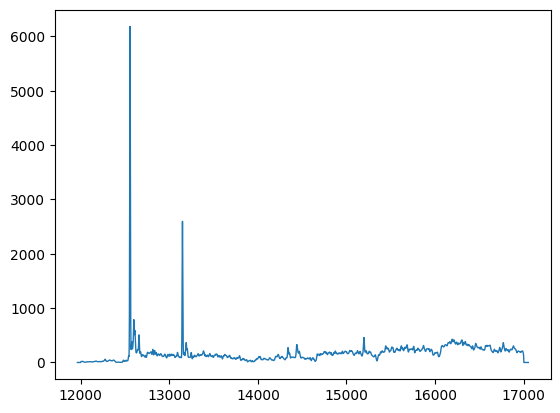

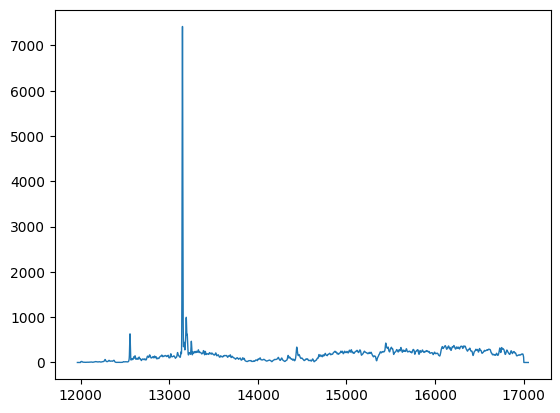

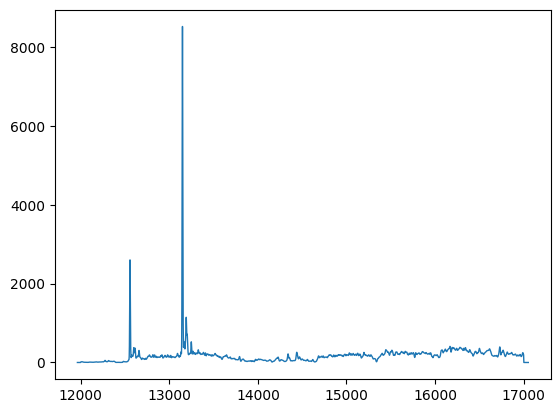

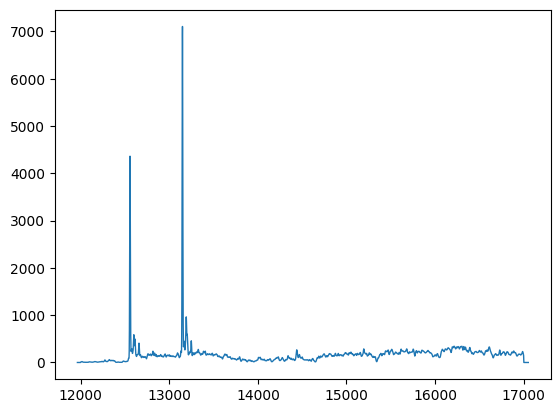

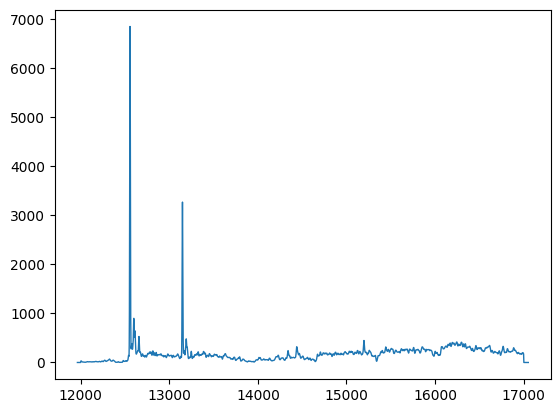

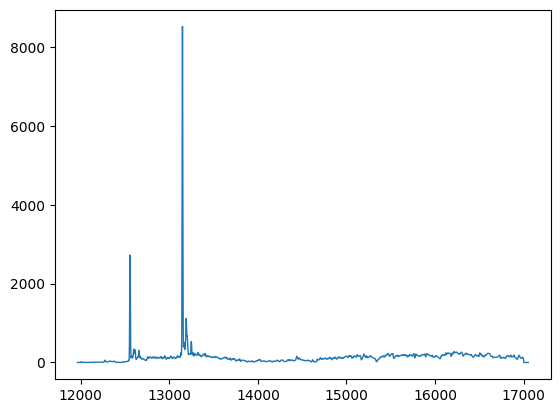

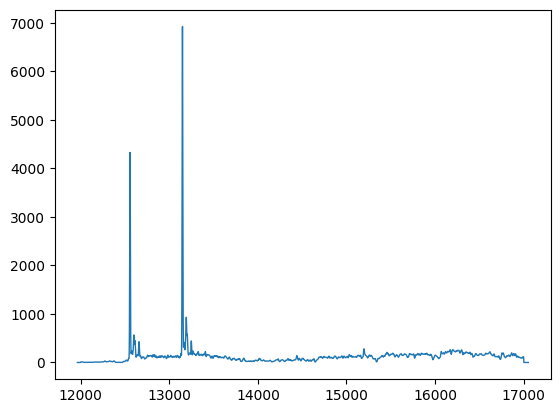

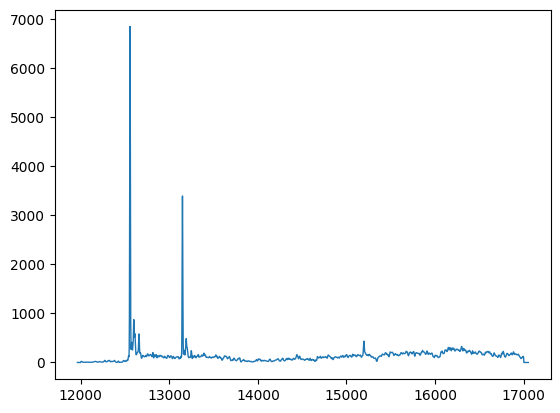

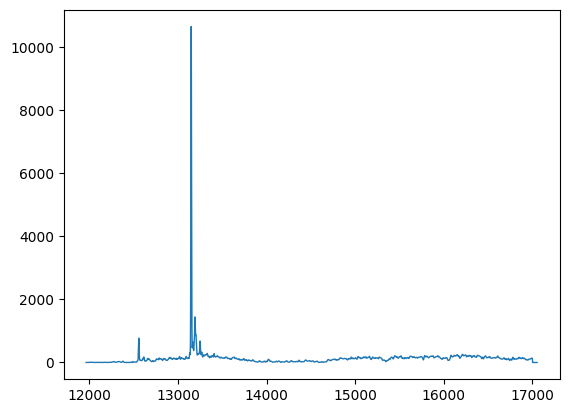

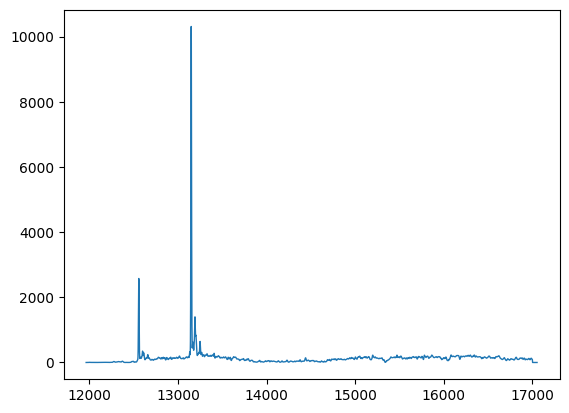

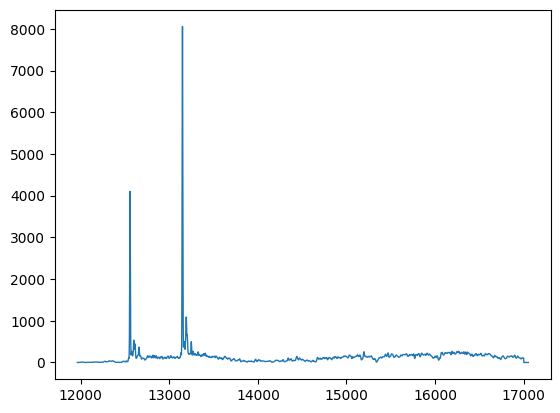

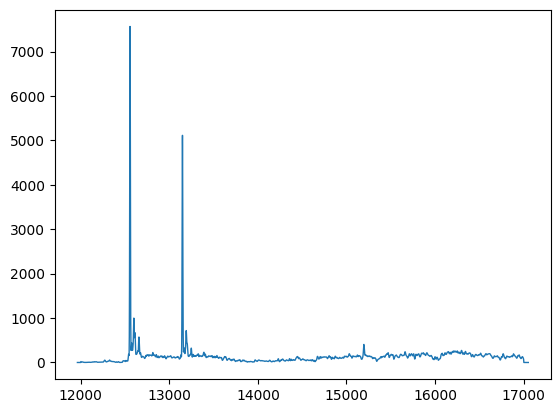

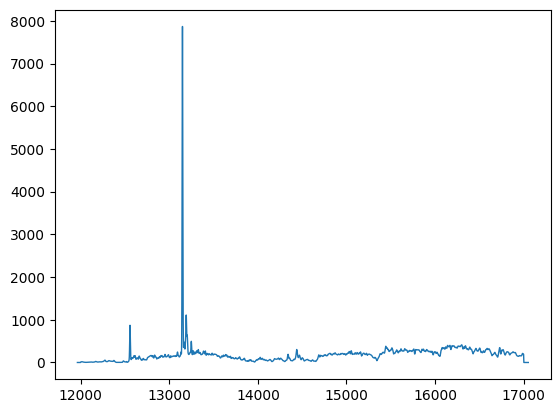

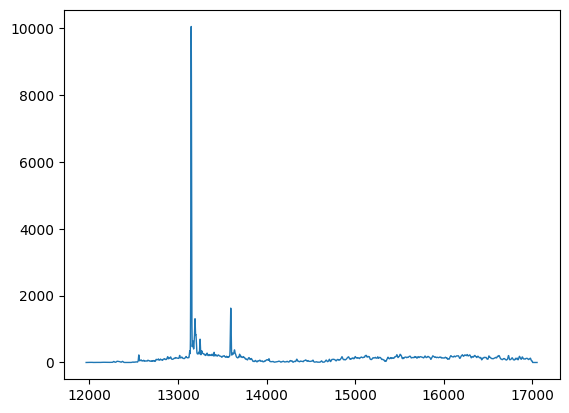

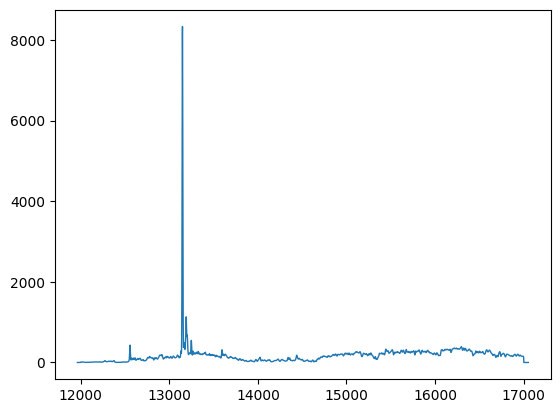

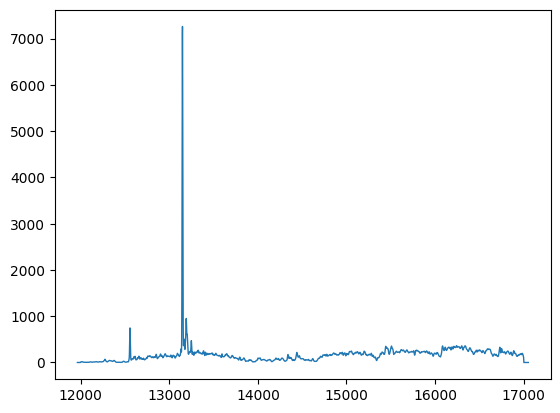

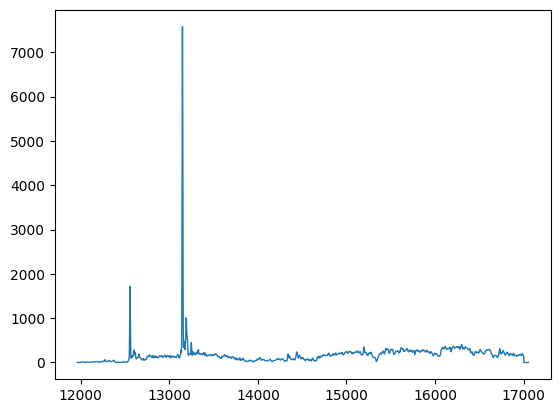

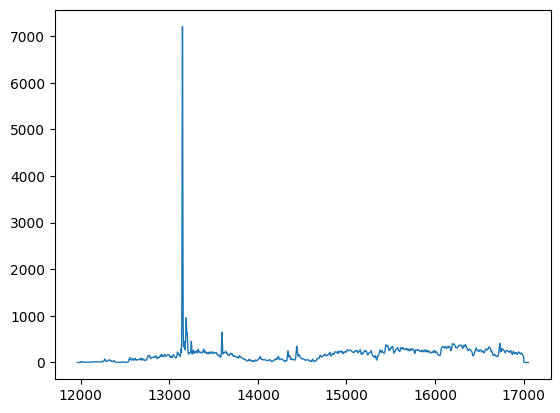

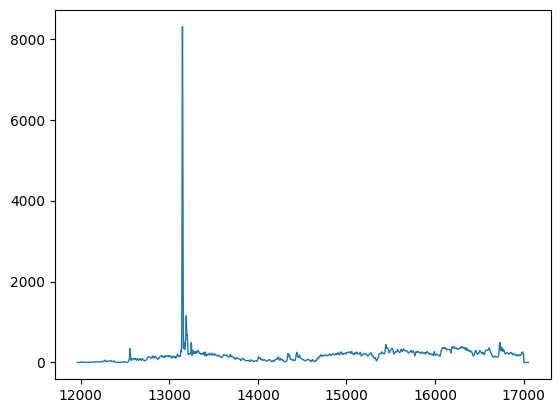

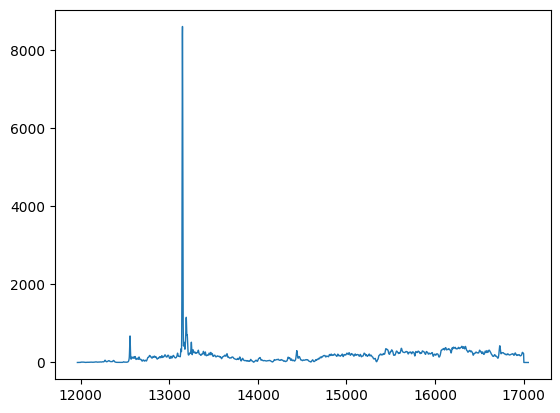

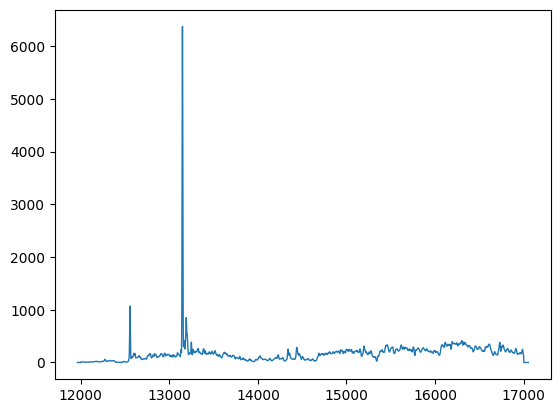

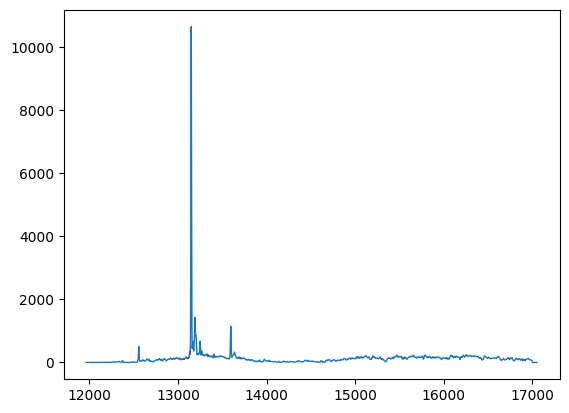

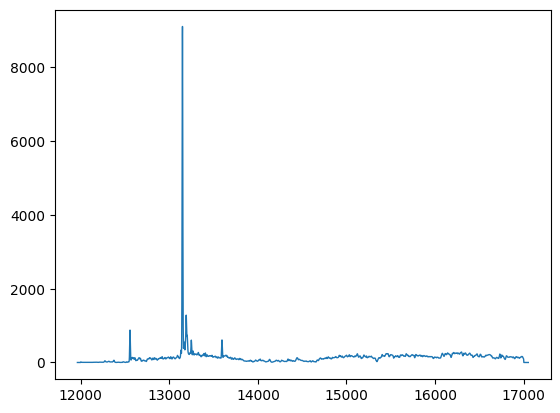

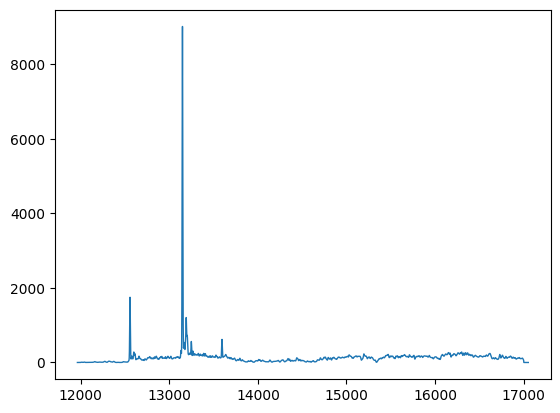

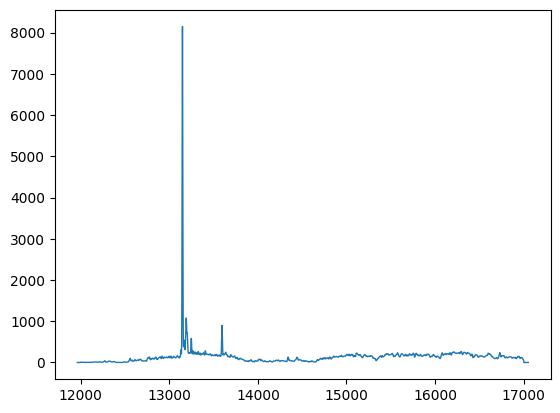

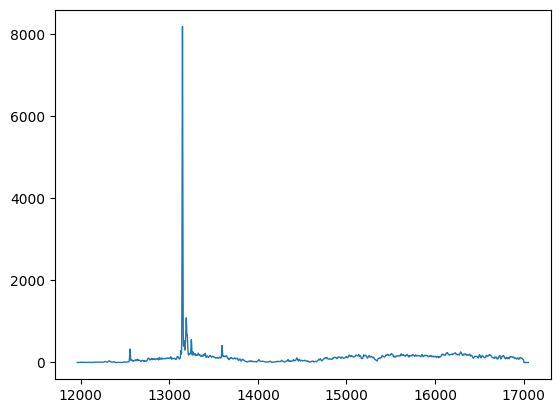

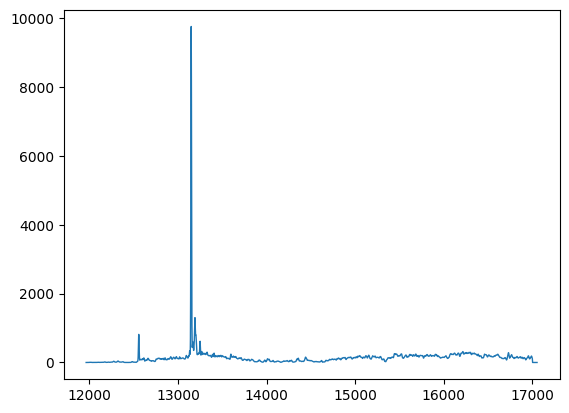

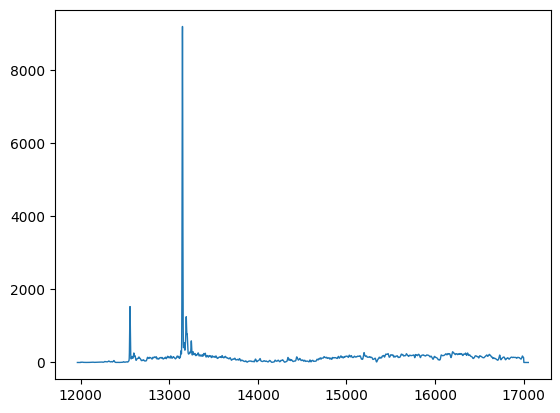

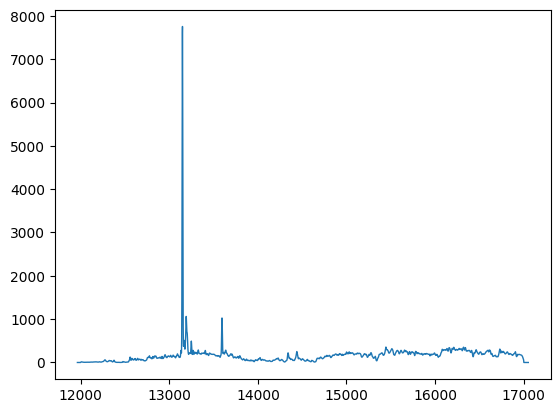

In [11]:
for s in eng.data.spectra:
    
    plt.plot(s.massdat[:,0],s.massdat[:,1],)
    # plt.xlim([13000, 14000])
    plt.show()

In [23]:
eng.config.peakthresh = 0.05

eng.pick_peaks()

Execution Time: 41.515399400000206
Peak info saved to: D:\WORK\20230710 DOE_CTB H6_5M_DAmp\24h\UniDec_Figures_and_Files\24h_extracts.txt


In [13]:
# eng.config.beta

20230710 15C_24h_1.d


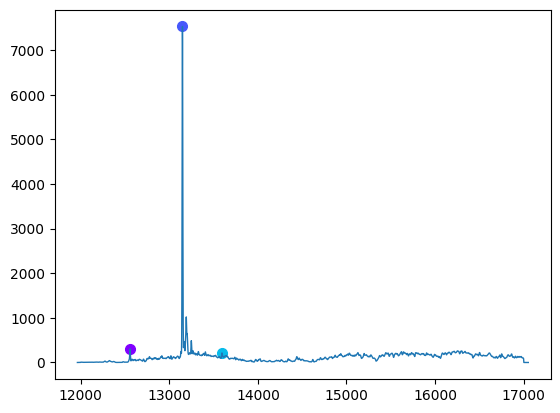

20230710 15C_24h_10.d


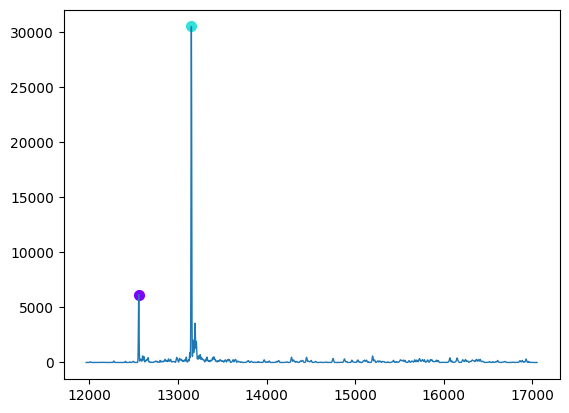

20230710 15C_24h_11.d


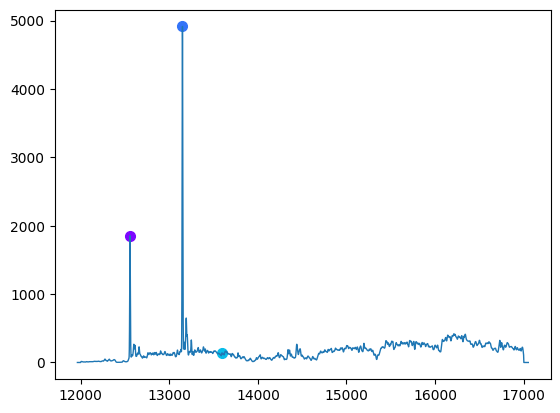

20230710 15C_24h_12.d


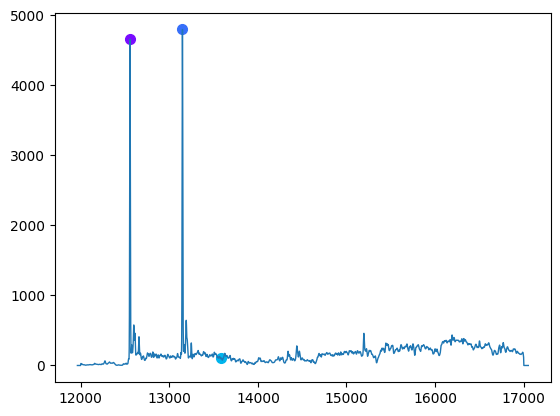

20230710 15C_24h_13.d


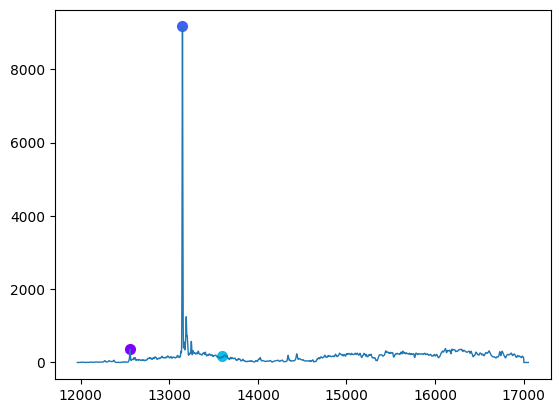

20230710 15C_24h_14.d


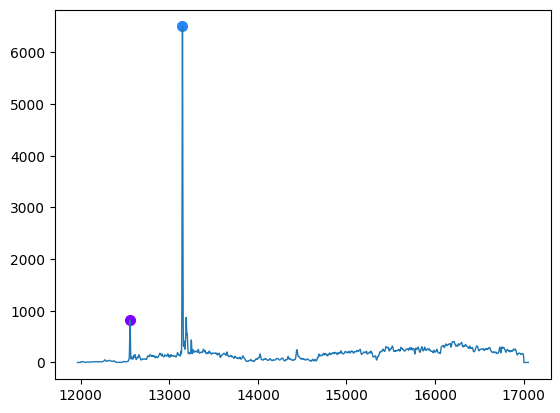

20230710 15C_24h_15.d


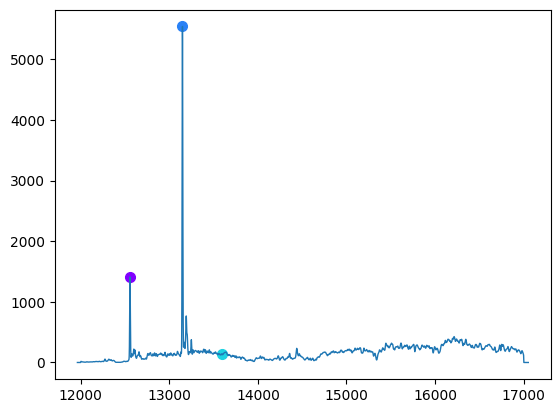

20230710 15C_24h_16.d


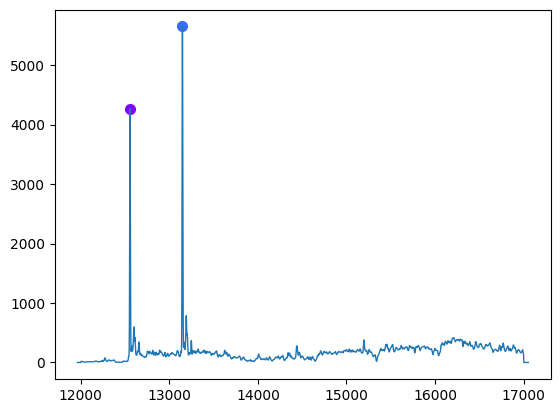

20230710 15C_24h_2.d


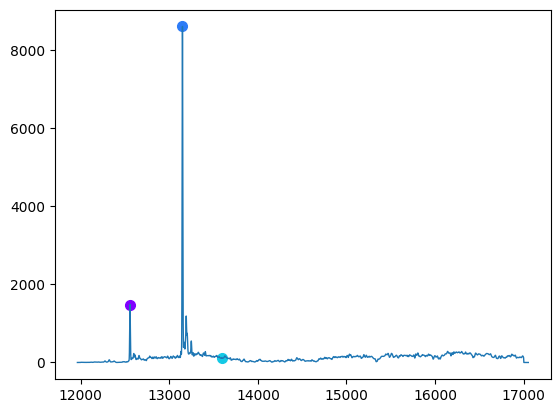

20230710 15C_24h_3.d


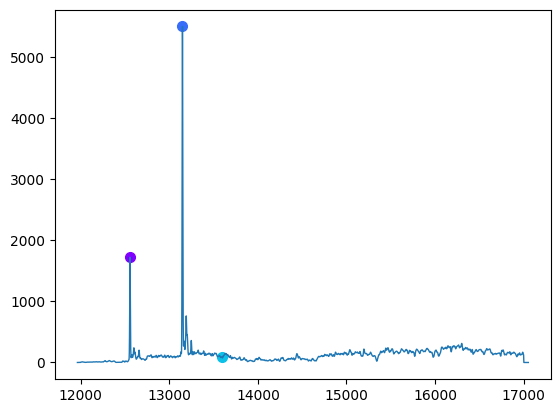

20230710 15C_24h_4.d


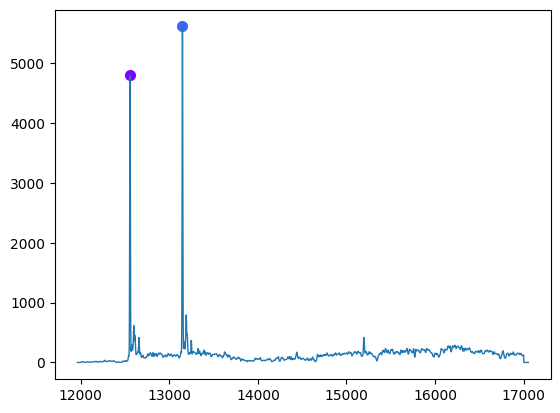

20230710 15C_24h_5.d


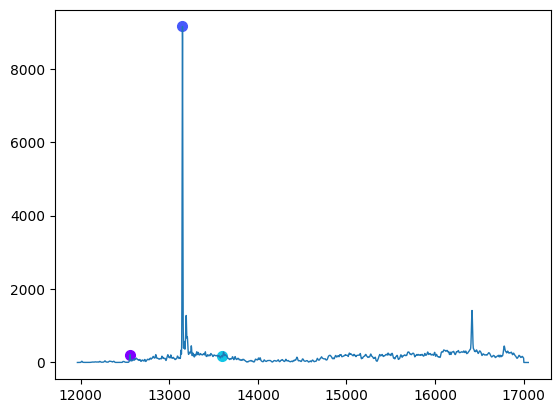

20230710 15C_24h_6.d


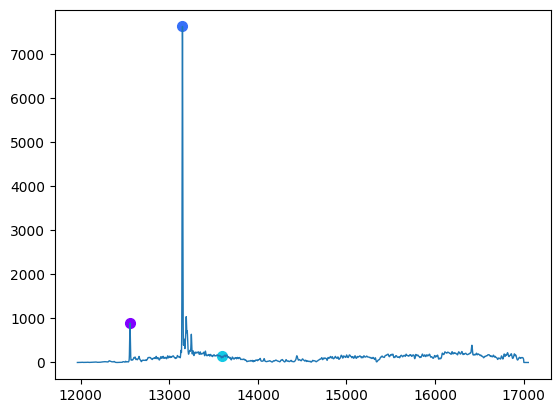

20230710 15C_24h_7.d


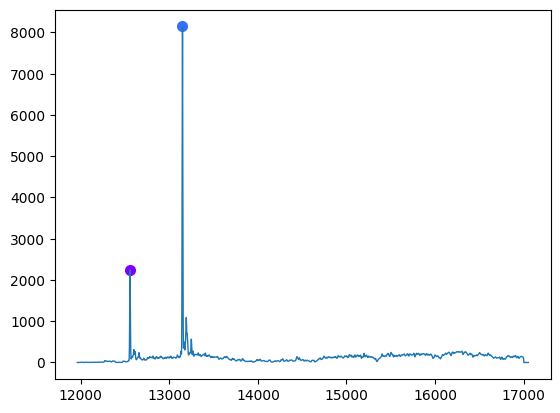

20230710 15C_24h_8.d


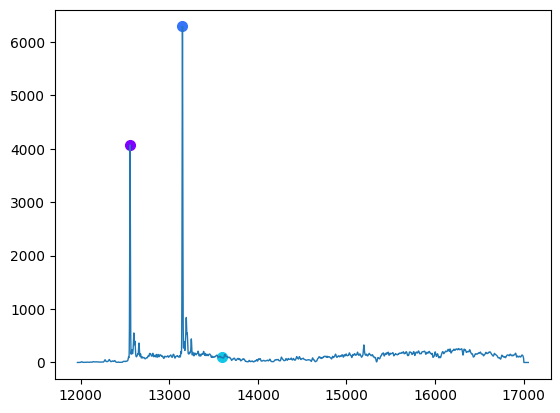

20230710 15C_24h_9.d


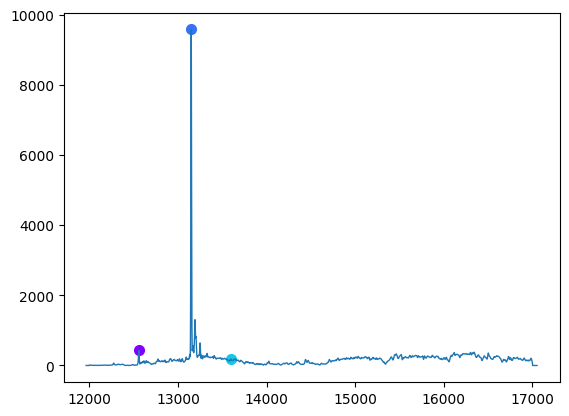

20230710 25C_24h_1.d


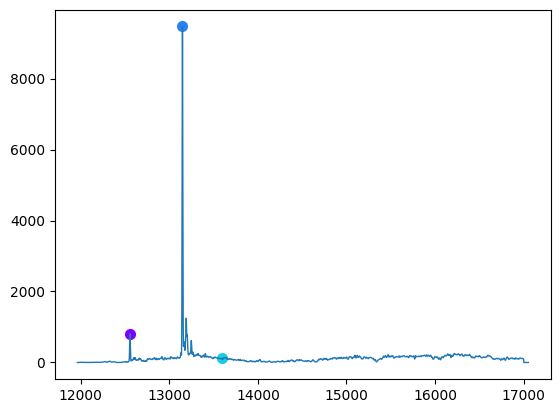

20230710 25C_24h_10.d


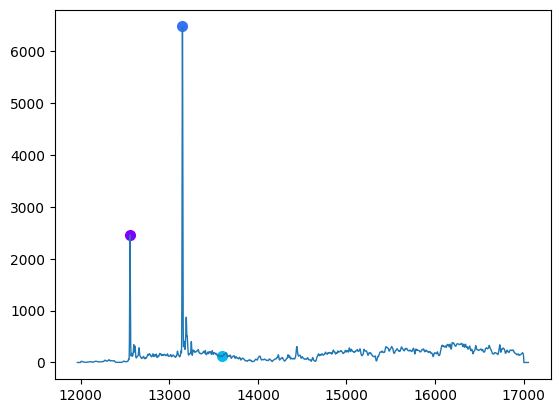

20230710 25C_24h_11.d


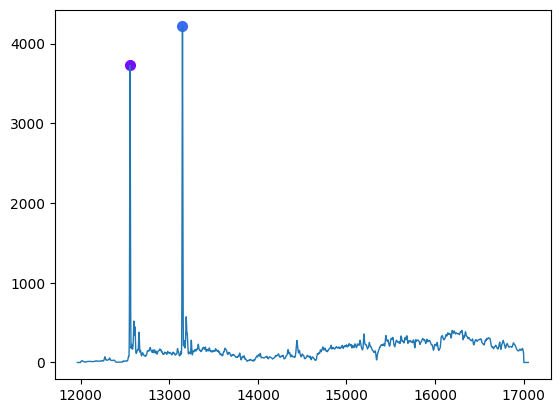

20230710 25C_24h_12.d


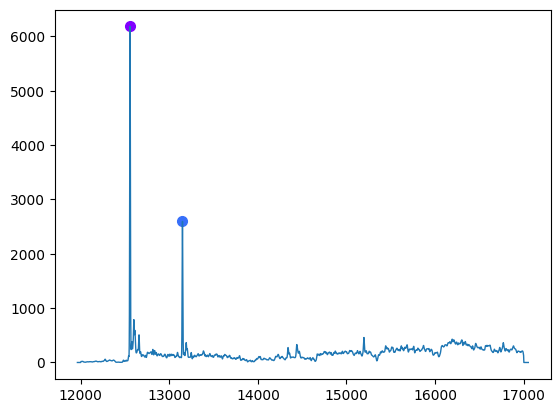

20230710 25C_24h_13.d


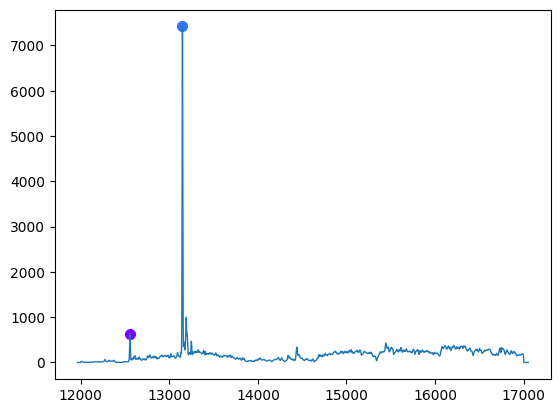

20230710 25C_24h_14.d


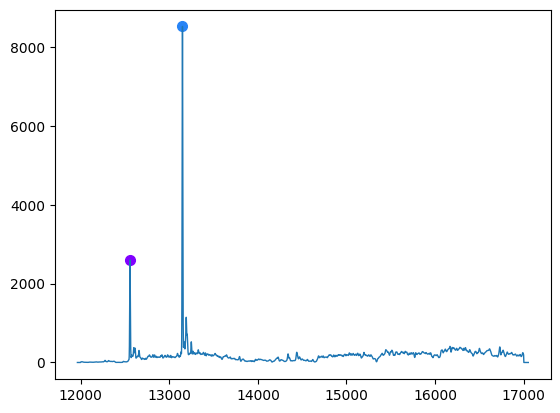

20230710 25C_24h_15.d


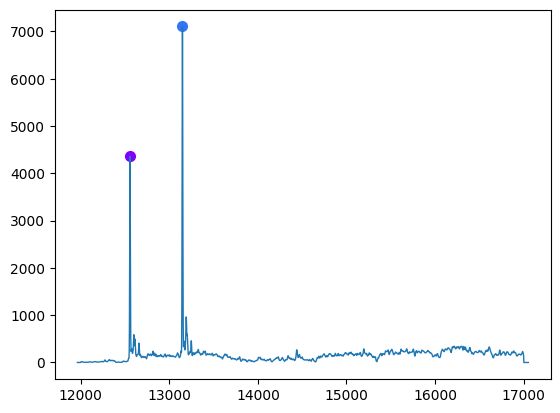

20230710 25C_24h_16.d


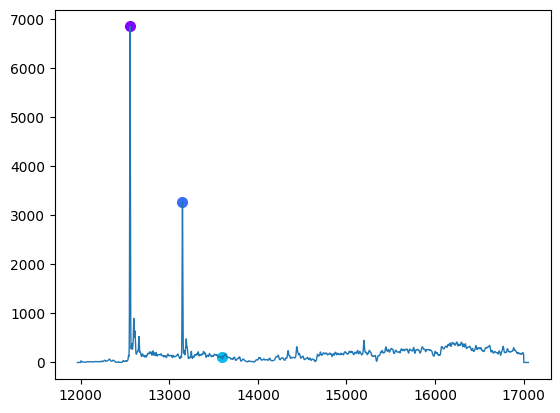

20230710 25C_24h_2.d


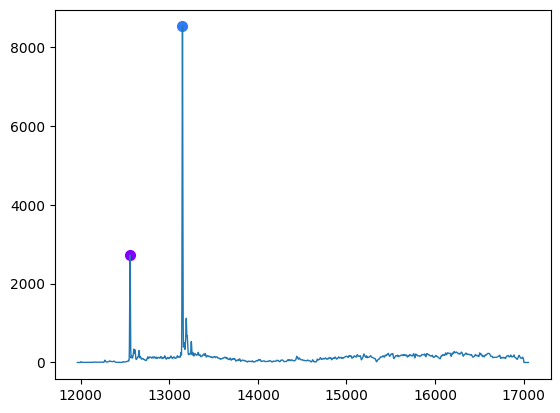

20230710 25C_24h_3.d


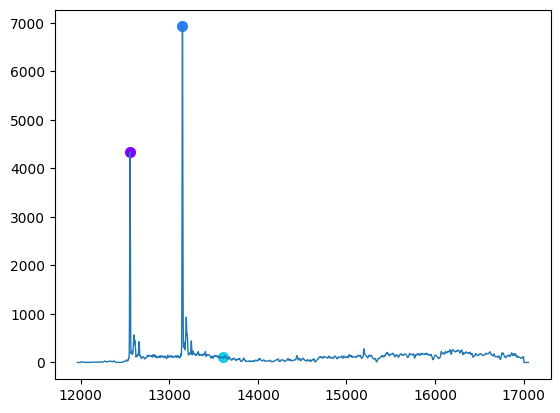

20230710 25C_24h_4.d


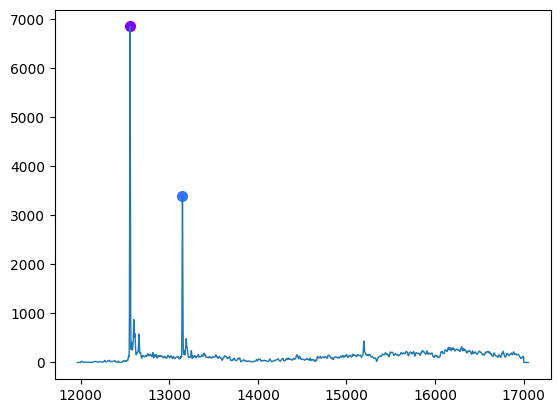

20230710 25C_24h_5.d


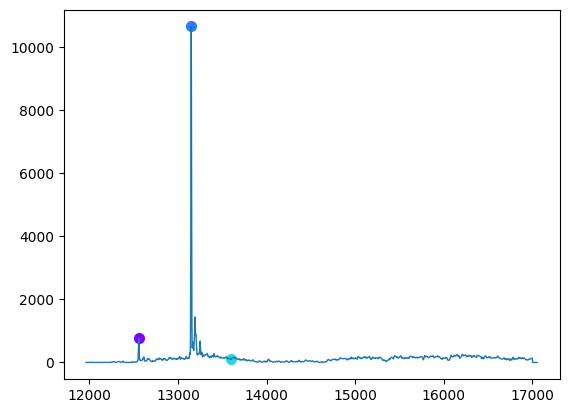

20230710 25C_24h_6.d


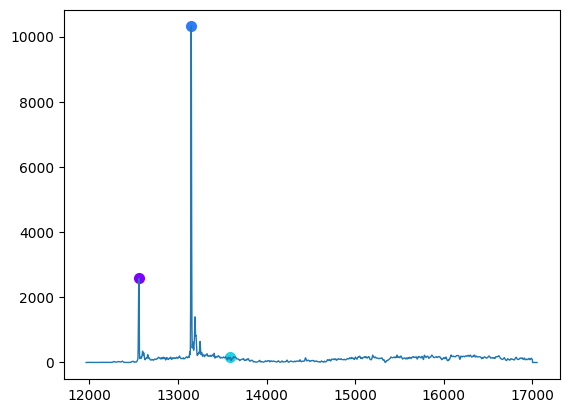

20230710 25C_24h_7.d


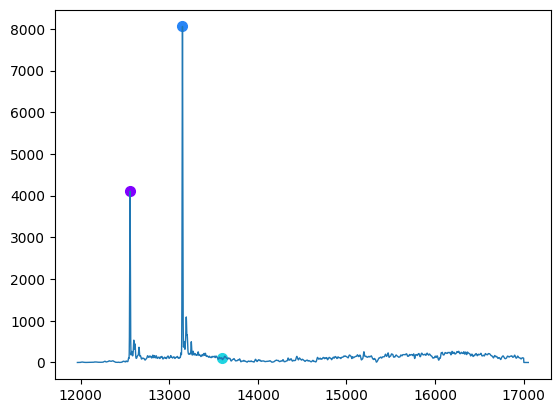

20230710 25C_24h_8.d


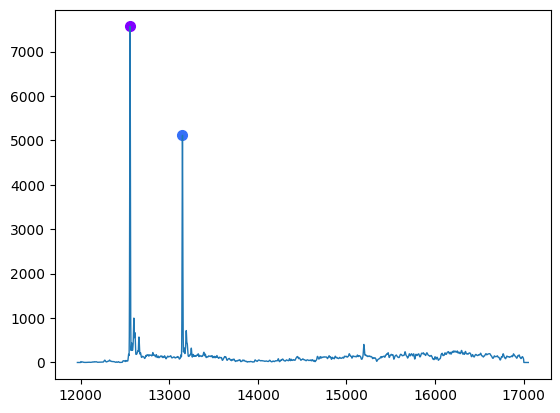

20230710 25C_24h_9.d


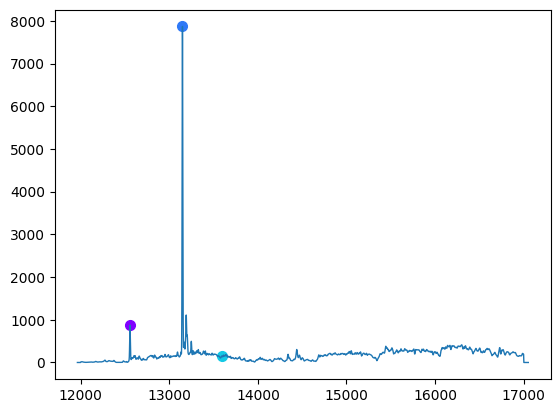

20230710 4C_24h_1.d


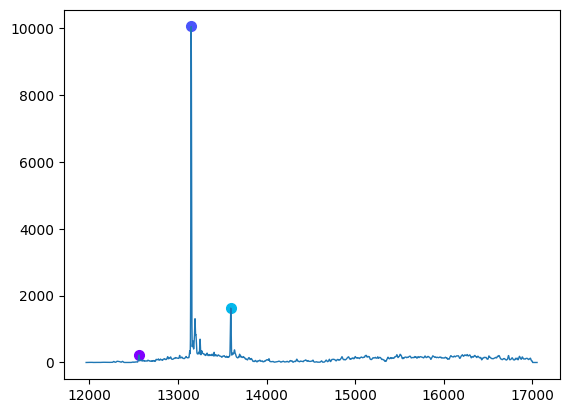

20230710 4C_24h_10.d


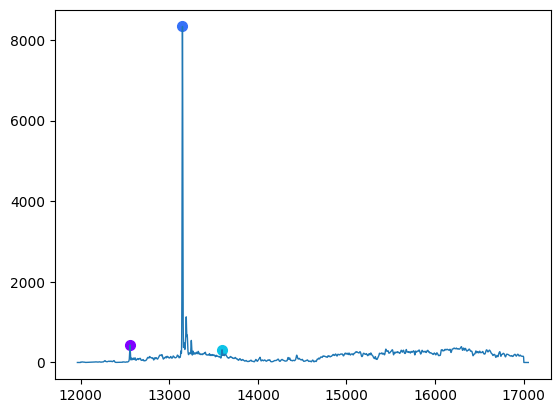

20230710 4C_24h_11.d


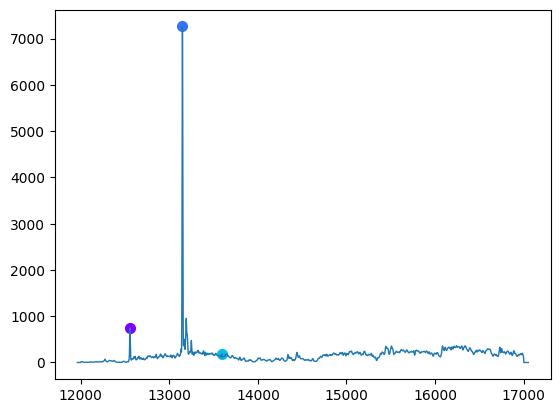

20230710 4C_24h_12.d


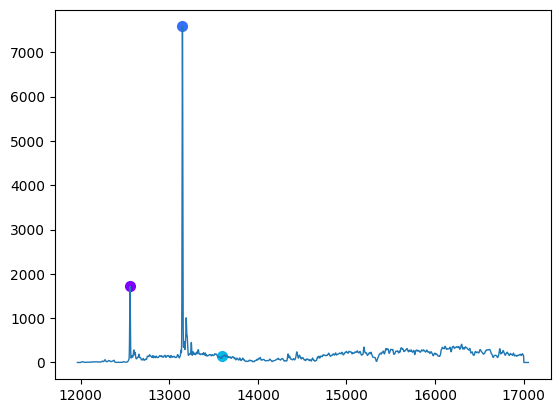

20230710 4C_24h_13.d


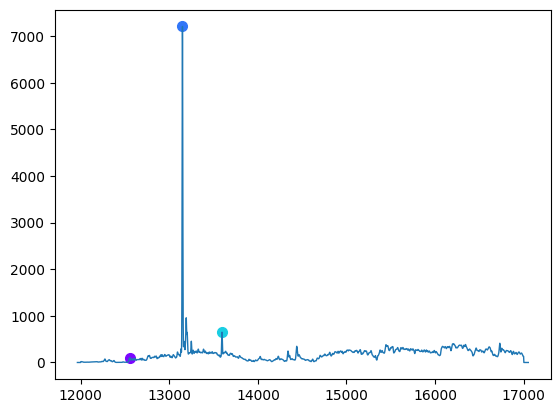

20230710 4C_24h_14.d


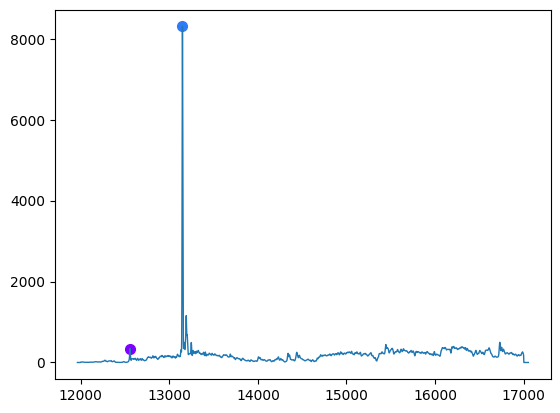

20230710 4C_24h_15.d


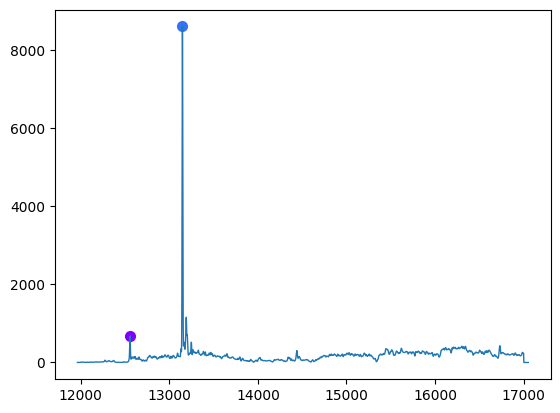

20230710 4C_24h_16.d


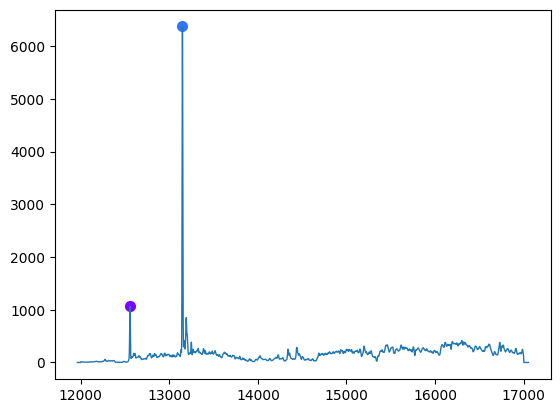

20230710 4C_24h_2.d


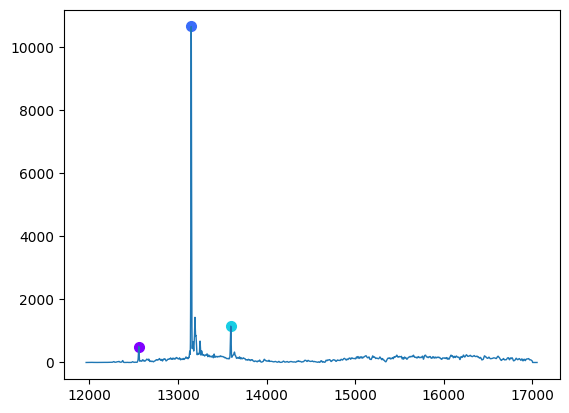

20230710 4C_24h_3.d


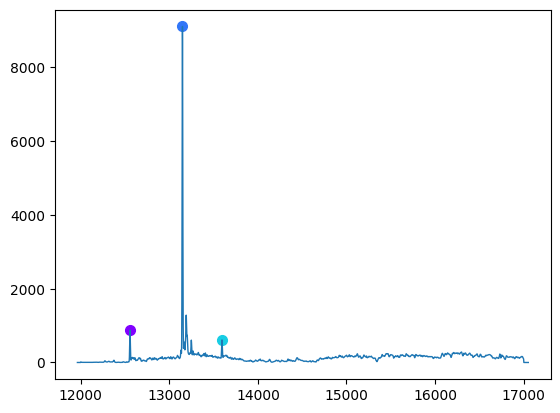

20230710 4C_24h_4.d


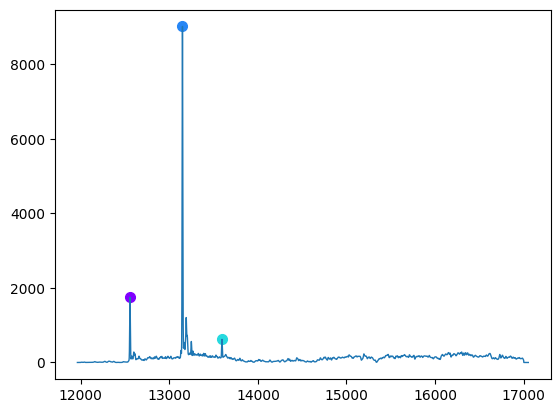

20230710 4C_24h_5.d


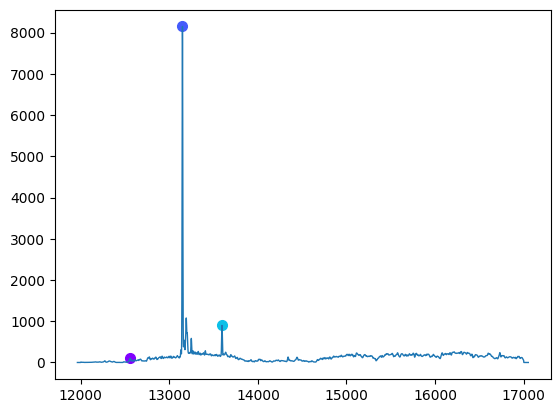

20230710 4C_24h_6.d


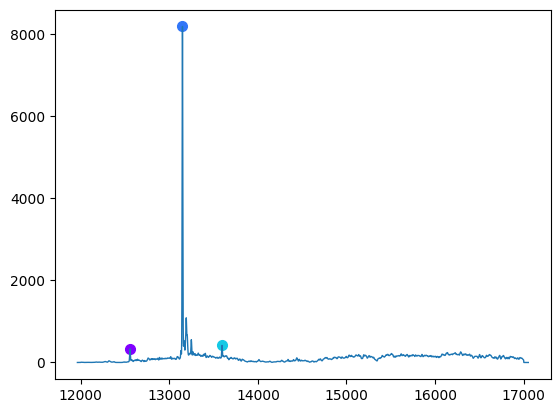

20230710 4C_24h_7.d


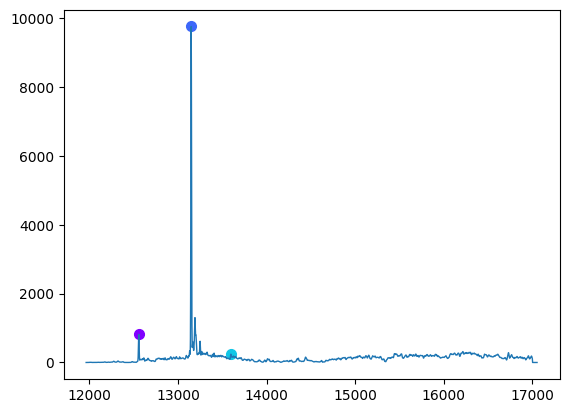

20230710 4C_24h_8.d


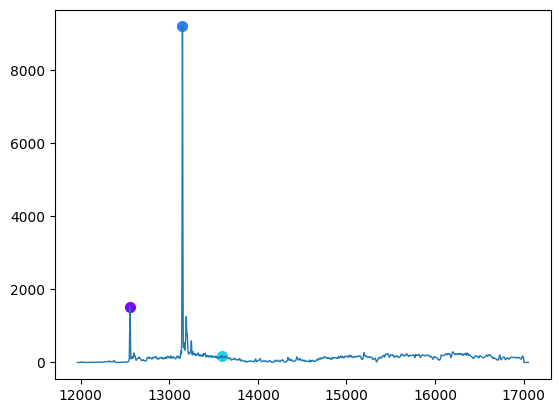

20230710 4C_24h_9.d


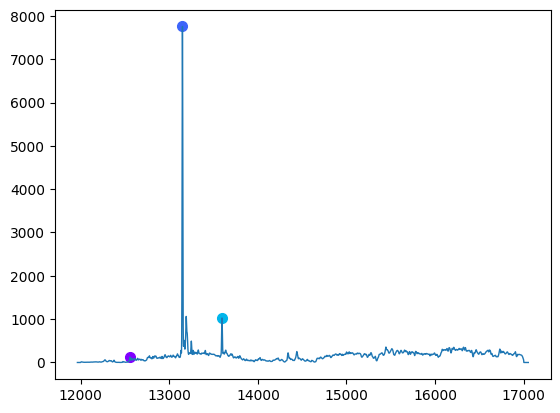

In [24]:
for s in eng.data.spectra:
    print(s.name)
    
    # match peaks to oligos
    match(s.pks.peaks, masslist, names, tolerance)
    
    
    
    plt.plot(s.massdat[:,0],s.massdat[:,1],)
    for p in s.pks.peaks:
#         plt.scatter(p.mass, p.height)
        if p.label != "":
            plt.scatter(p.mass, p.height, color = p.color)
    plt.show()
    
# dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}    

In [15]:
dfs = []
for s in eng.data.spectra:
    counter = 0
    label = []
    mass = []
    height = []
    for p in s.pks.peaks:

        if p.label !="":

            label.append(p.label)
            mass.append(p.mass)
            height.append(p.height)
            counter = counter+1
    s_name = [s.name]*counter

    dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}
    df = pd.DataFrame(dct)
    df['Percentage_Labelling'] = (df.Height/df.Height.sum())*100
    dfs.append(df)
results_df = pd.concat(dfs)

In [16]:
results2 = pd.pivot(results_df, index='Name', columns='Label', values = 'Percentage_Labelling').fillna(0)

results2.reset_index(inplace=True)


In [17]:
conditions_input_df = pd.read_excel(os.path.join(directory, "Conditions_input.xlsx"))

In [18]:
results2.Name = results2['Name'].str.rstrip('.d')

In [19]:
results2 = conditions_input_df.merge(results2, how='left', on="Name")

In [20]:
results2

,Name,Temperature (° C),Time (h),No. of eq. of peptide,% Damp,%Srt5M,CTB-H6,CTB-LPET,CTB-LPETGVSEYG
0,20230710 4C_18h_1,4,18,2,3,1,NaN,NaN,NaN
1,20230710 4C_18h_2,4,18,2,3,3,NaN,NaN,NaN
2,20230710 4C_18h_3,4,18,2,3,5,NaN,NaN,NaN
3,20230710 4C_18h_4,4,18,2,3,10,NaN,NaN,NaN
4,20230710 15C_18h_1,15,18,2,3,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
139,20230710 15C_48h_16,15,48,3,5,10,NaN,NaN,NaN
140,20230710 25C_48h_13,25,48,3,5,1,NaN,NaN,NaN
141,20230710 25C_48h_14,25,48,3,5,3,NaN,NaN,NaN
142,20230710 25C_48h_15,25,48,3,5,5,NaN,NaN,NaN


In [21]:
results_name = os.path.split(directory)[1]+"_results.xlsx"
results_path = os.path.join(directory,results_name)
results2.to_excel(results_path)